**Домашнее задание к лекции "Визуализация данных"**

Обязательная часть

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

*   построить не менее 4 визуализаций различных видов;
*   каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
*   по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте приложить ссылку на данные). Если идей нет, можете взять один из перечисленных ниже:

*   данные приложений из Google Play;
*   данные о видео из трендов YouTube;
*   данные об уровне счастья в разных странах.


Даные:\
E-commerce - Users of a French C2C fashion store:\
https://www.kaggle.com/datasets/jmmvutu/ecommerce-users-of-a-french-c2c-fashion-store

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Увеличим дефолтный размер графиков

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,7

Загружаю данные

In [ ]:
df_fashion = pd.read_csv('6M-0K-99K.users.dataset.public.csv', low_memory=False)

In [ ]:
df_fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

Визуализировать данные в отрыве от задачи довольно сложно. Предположим, что мы (предприимчивые французы, желающие покорить мир) хотим создать C2C приложение по продаже товаров.

На какие вопросы хотелось бы ответить с помощью визуализации (исходя из имеющихся данных):
- Где находятся самые активные пользователи?
- Где больше продают, где больше покупают?
- Используют ли они приложения, если да, то в каких странах больше?
- Какие приложения более популярны: Android или Ios? Где какие?
- На каких языках необходимо сделать версии в первую очередь?

Посмотрим на активность пользователей в покупках и продажах по странам (возьмём самые многочисленные из представленных)

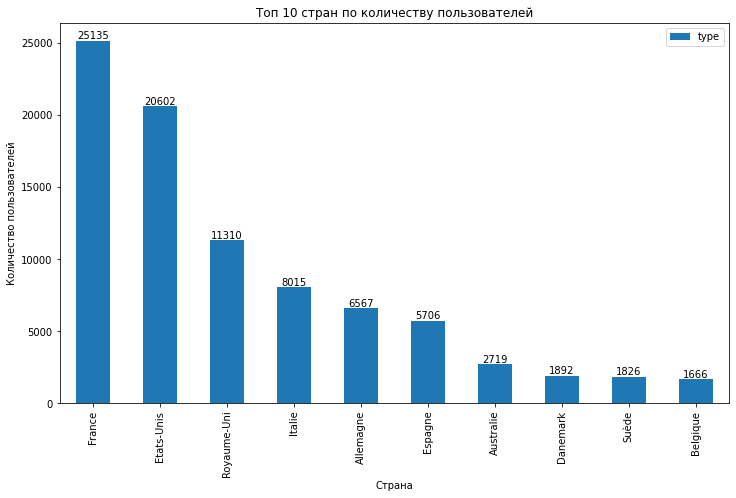

In [ ]:
top10_countries = df_fashion[['type', 'country']].groupby('country').count().sort_values('type', ascending=False).head(10)
top10_countries.plot(kind='bar', title='Топ 10 стран по количеству пользователей',
                             xlabel='Страна',
                             ylabel='Количество пользователей')
for i, val in enumerate(top10_countries.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

Теперь посмотрим, как распределилсь данные по покупкам и продажам:

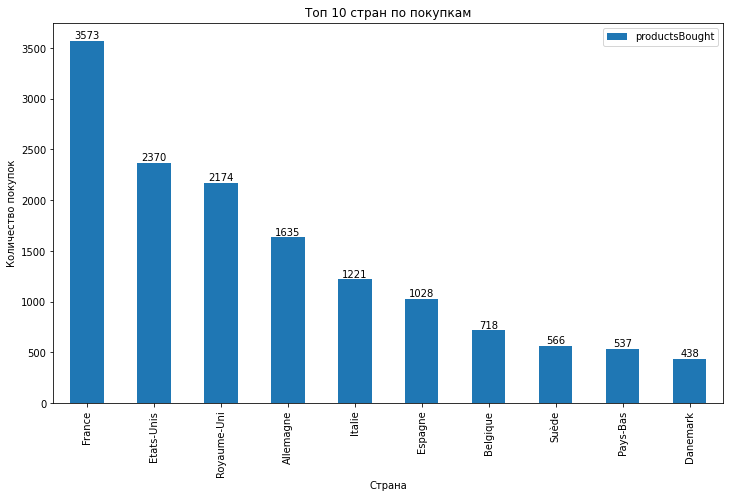

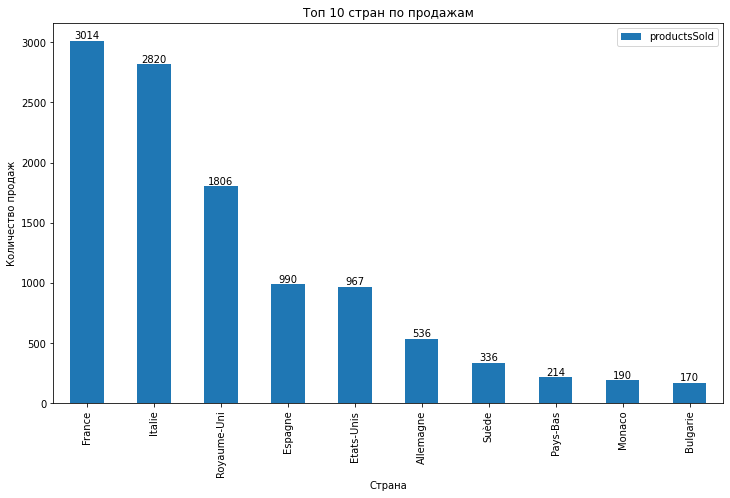

In [ ]:
top10_countries_buy = df_fashion[['productsBought', 'country']].groupby('country').sum().sort_values('productsBought', ascending=False).head(10)
top10_countries_buy.plot(kind='bar', title='Топ 10 стран по покупкам',
                             xlabel='Страна',
                             ylabel='Количество покупок')
for i, val in enumerate(top10_countries_buy.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})


top10_countries_sell = df_fashion[['productsSold', 'country']].groupby('country').sum().sort_values('productsSold', ascending=False).head(10)
top10_countries_sell.plot(kind='bar', title='Топ 10 стран по продажам',
                             xlabel='Страна',
                             ylabel='Количество продаж')
for i, val in enumerate(top10_countries_sell.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})

Несмотря на то, что Франция в обоих графиках на первом месте, далее распределение стран не так похоже. Имеет смысл рассмотреть Францию и Италию в первую очередь для продвижения приложения как площадки **для продажи** своих товаров. США, например, вторая по количеству пользователей страна в большей степени демонстрирует потребительское поведение, а по продажам находится всего лишь на 5-ом месте.

Сравним пользователей по использованию Android и Ios:

In [ ]:
apps_by_country = df_fashion[['hasAndroidApp', 'hasIosApp','country']].groupby('country').sum().sort_values('hasAndroidApp', ascending=False).head(10)


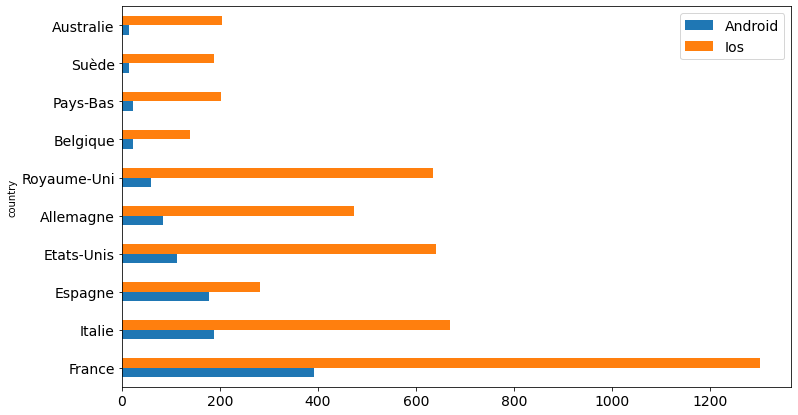

In [ ]:
apps_by_country.plot(kind='barh', fontsize = 14)
plt.legend(['Android', 'Ios'], fontsize = 14)

Очевидно, что пользователи предпочитают Ios, и для начала имеет смысл создавать прложение для Ios. Если мы захотим выходить на испанский рынок, то тут уже иммеет смысл оценить выгодность Android. Но по предыдущим визуализациям понятно, что Испания не в приоритете.

Интересно посмотреть как распределены пользователи по показателям: приложение на Android, приложение на Ios, не используют приложение.

In [ ]:
df_fashion['no_app']= ~df_fashion['hasAnyApp']
df_fashion.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,no_app
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,True,False,True,True,11,3196,106.53,8.88,gb,False
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,...,True,False,True,True,12,3204,106.80,8.90,mc,False
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,...,True,False,True,False,11,3203,106.77,8.90,fr,False
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,...,True,False,True,False,12,3198,106.60,8.88,us,False
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,...,False,False,False,True,22,2854,95.13,7.93,us,True


Создадим таблицу с учетом тех, кто не использует приложения:

In [ ]:
apps_by_country_full = df_fashion[['no_app','hasAndroidApp', 'hasIosApp','country']].\
                                  groupby('country').sum().sort_values('hasAndroidApp', \
                                                                       ascending=False).head(10)

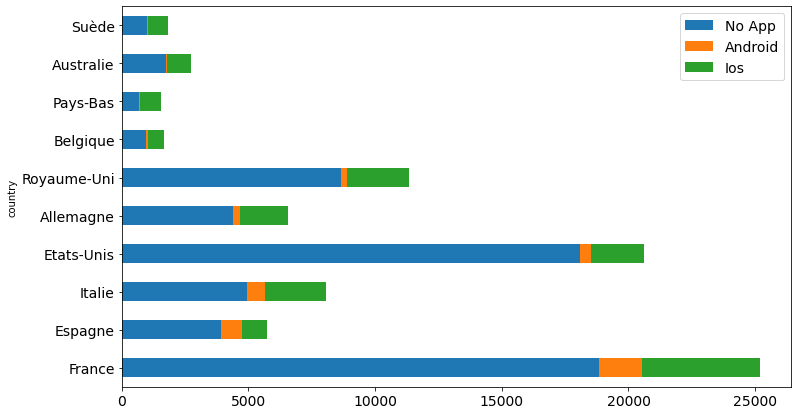

In [ ]:
apps_by_country_full.plot(kind='barh', stacked=True, fontsize = 14)
plt.legend(['No App','Android', 'Ios'], fontsize = 14)

По графику видно, что аудитория, не использующая приложения, гораздо больше аудитории, которая пользуется приложениями. Это в корне может повлиять на выбор страны, где имеет смысл продвигать планируемый продукт. Например, Италия, Германия или Бельгия выглядят более перспективными.

Попробуем оценить на основе предыдущих визуализаций, какие языки предпочтительны у самых активных пользователей.

In [ ]:
df_countries_active = df_fashion[df_fashion['country'].isin(['France','Italie','Etats-Unis','Royaume-Uni','Allemagne','Espagne'])]
df_countries_active

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,no_app
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,True,False,True,True,11,3196,106.53,8.88,gb,False
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,...,True,False,True,False,11,3203,106.77,8.90,fr,False
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,...,True,False,True,False,12,3198,106.60,8.88,us,False
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,...,False,False,False,True,22,2854,95.13,7.93,us,True
5,7631788075812383072,user,Allemagne,de,130,12,1,47,123,91.0,...,True,False,True,False,11,3196,106.53,8.88,de,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98905,3164321379397826945,user,Etats-Unis,en,3,8,6,0,0,0.0,...,False,False,False,True,655,3204,106.80,8.90,us,True
98907,-5212100190867739388,user,Etats-Unis,en,3,8,0,0,0,0.0,...,False,False,False,True,708,3204,106.80,8.90,us,True
98908,-5324380437900495747,user,Etats-Unis,fr,3,8,0,0,0,0.0,...,False,False,False,True,708,3204,106.80,8.90,us,True
98909,-5607668753771114442,user,France,fr,3,8,0,0,0,0.0,...,True,False,True,True,695,3204,106.80,8.90,fr,False


In [ ]:
!pip install squarify

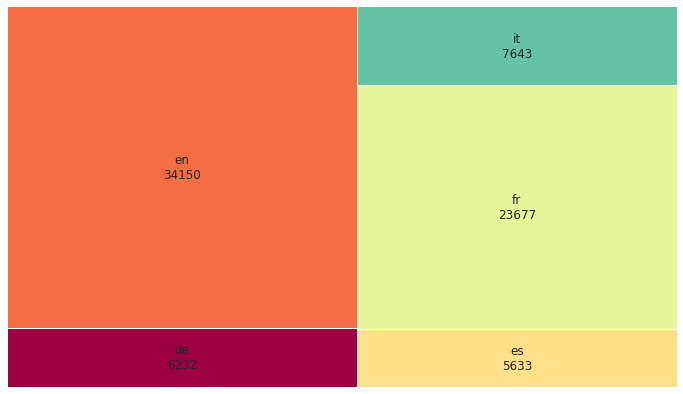

In [ ]:
import squarify

df = df_countries_active.groupby('language').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + '\n' + str(x[1]), axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=1)

plt.axis('off')
plt.show()

В первую очередь стоит разрабатывать версии приложений на английском, французском и итальянском языках.

Посмотрим, как распределены пользователи по полу.

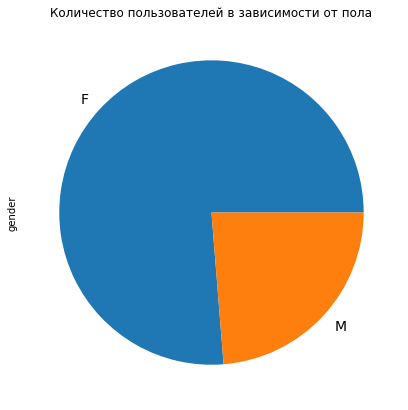

In [ ]:
users_by_gender = df_countries_active['gender'].value_counts()
users_by_gender.plot(kind='pie', title='Количество пользователей в зависимости от пола', fontsize = 14)

БОльшая часть пользователей - женщины. В первую очередь имеет смысл вести коммуникацию с ними. Пользовательское поведение женщин и мужчин отличается. Если у нас нет желания завоёвывать мужскую аудиторию по каким-либо причинам. Имеет смысл сравнить женщин и мужчин по показателям покупок и продаж.

Посмотрим, как ведут себя пользователи в выбранных странах (6 самых активных), по показателю **daysSinceLastLogin**.

Text(0.5, 0, 'Количество дней')

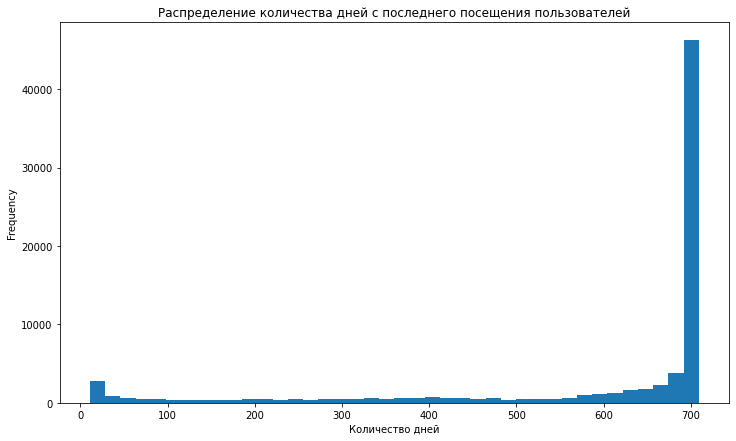

In [ ]:
df_countries_active['daysSinceLastLogin'].plot(kind='hist',
                   title='Распределение количества дней с последнего посещения пользователей', bins=40)
plt.xlabel('Количество дней')

Распределение ненормальное. Большинство пользователей уже около 2-х лет не появлялись.

Посмотрим по интересующим нас странам в отдельности (Франция, Италия), как распределены пользователи, которые появлялись не менее чем 30 дней назад:

In [ ]:
france = df_countries_active[(df_countries_active['country'] == 'France')&
                             (df_countries_active['daysSinceLastLogin'] < 30)]
italy = df_countries_active[(df_countries_active['country'] == 'Italie')&
                             (df_countries_active['daysSinceLastLogin'] < 30)]

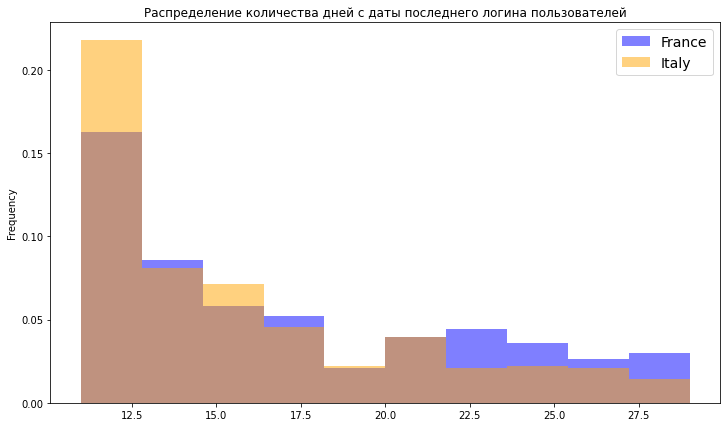

In [ ]:
france['daysSinceLastLogin'].plot(kind='hist', alpha = 0.5,bins=10,
                                  density = True,color = 'blue',
                                  label = 'France',legend = True)
italy['daysSinceLastLogin'].plot(kind='hist', alpha = 0.5, bins=10,
                                 density = True, color = 'orange',
                                 label = 'Italy',legend = True)

plt.title('Распределение количества дней с даты последнего логина пользователей')
plt.legend(loc=0, fontsize=14)

Италия лидирует по количеству пользователей, что логинились совсем недавно.

Возможно, менее активные пользователи как раз дольше всех не логинились. Проверим гипотезу, построив точечную диаграмму по связи показателей **productsSold** и **daysSinceLastLogin**

(0.0, 750.0)

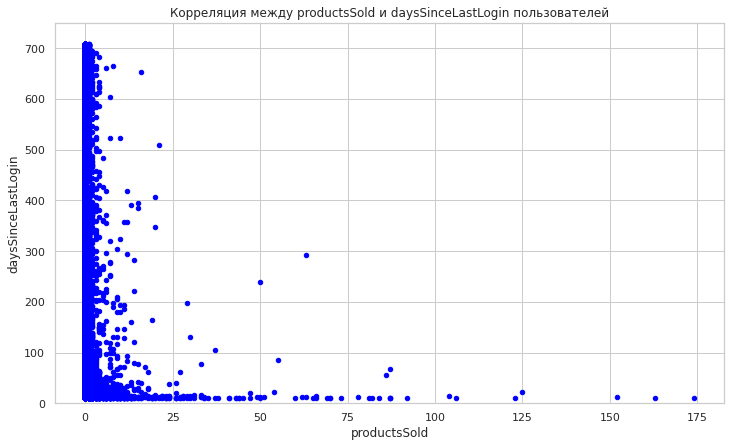

In [ ]:
df_countries_active.plot(kind='scatter', color = 'blue',\
                          x='productsSold',\
                          y='daysSinceLastLogin',\
                          title='Корреляция между productsSold и daysSinceLastLogin пользователей')

plt.ylim(0, 750)

Визуализация не подкрепляет гипотезу о том, что чем больше дней прошло с момента последнего логина, тем менее активный пользователь. Но почти все пользователи с большим количеством продаж, логинились относительно недавно.

**Дополнительная часть (необязательная)**


*   построить дополнительно не менее 2 визуализаций (итого не менее 6);
*   в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;



In [ ]:
import seaborn as sns

Посмотрим, как распределены числовые показатели в том числе по тем столбцам, которые мы еще не учитывали.

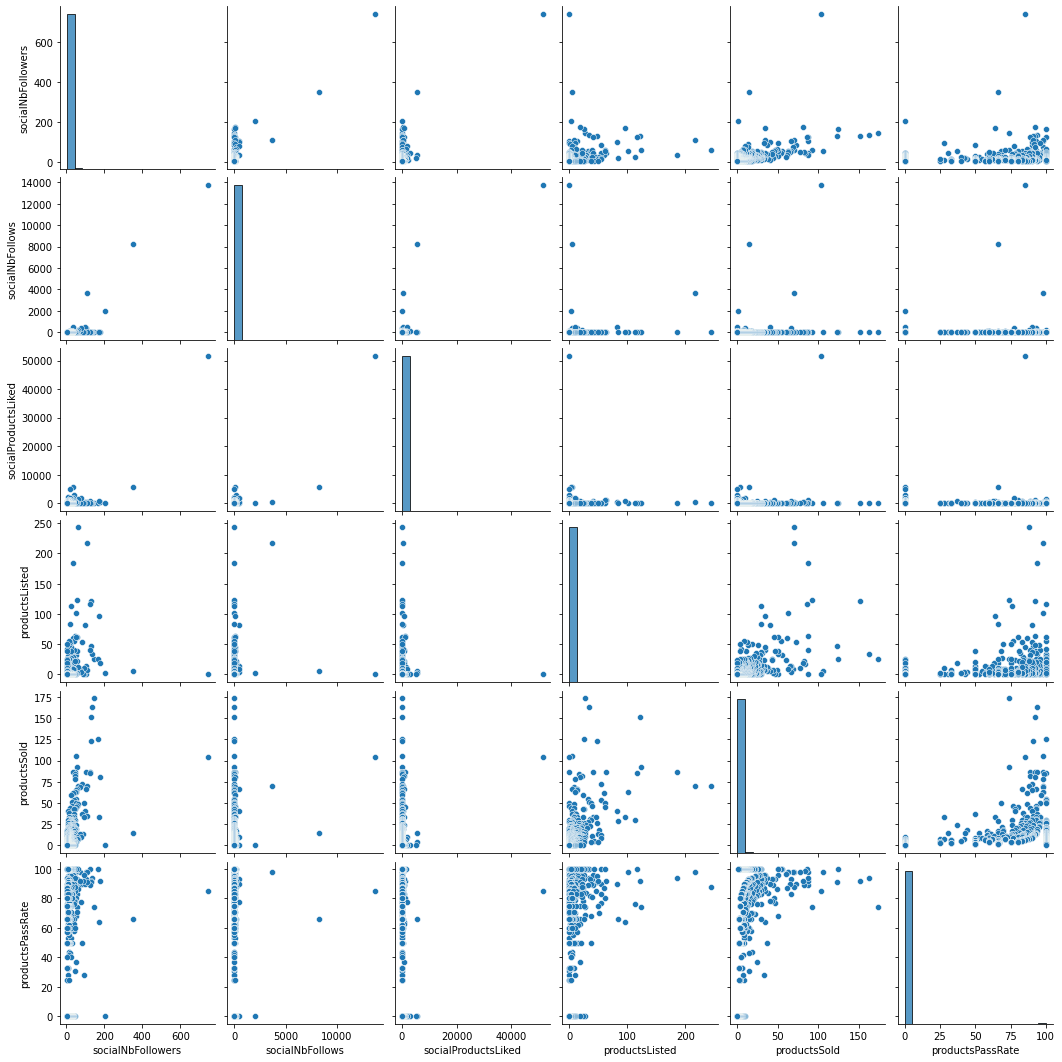

In [ ]:
df_digit = df_countries_active[['socialNbFollowers','socialNbFollows',
                                'socialProductsLiked','productsListed',
                                'productsSold','productsPassRate']]
sns.pairplot(df_digit)

Наблюдается взаимосвязь между показателями проданных товаров и их рейтингом, что логично. Так же можно предположить, что существует какая-то взаимосвять между количеством подписчиков и количеством проданных товаров. Что тоже вполне объяснимо.

Сравним значения по последнему логину по странам с помощью  boxplot

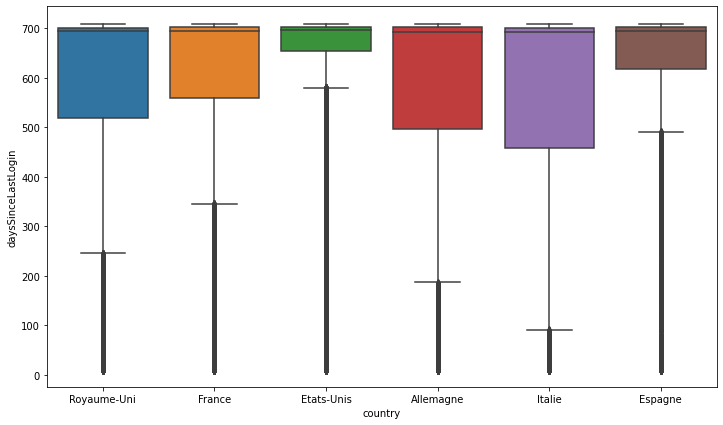

In [ ]:
sns.boxplot(x='country', y='daysSinceLastLogin',data=df_countries_active)

На графике видно, что "свежее" всего пользователи из Италии, обратный результат демонстрируют пользователи из США.

Построим более красивую версию - violin plot, добавим еще разделение по полу:

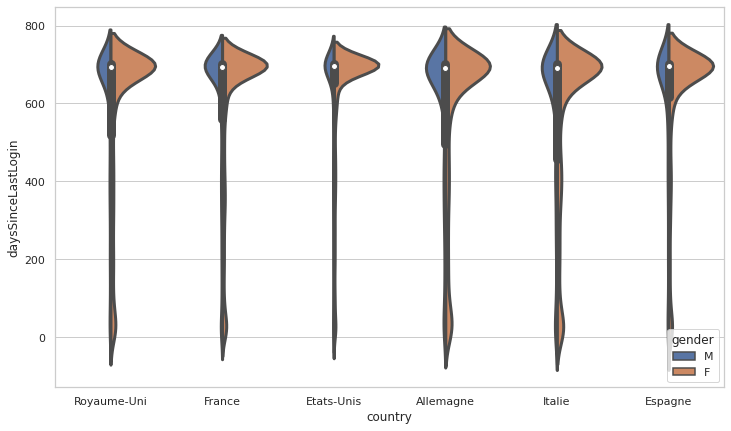

In [ ]:
sns.set(style = 'whitegrid')
sns.violinplot(x ='country', y ='daysSinceLastLogin',\
               hue='gender', split=True, scale='count',\
               data = df_countries_active, linewidth = 3)


Визуально тут сложно найти различия, только США выделяются. Менее четко видны максимум, минимум и выбросы. Разница между женщинами и мужчинами просматривается в основном по количеству. Внизу (недавно залогинившиеся) просматриваются отметки в категории женщины в большей степени, что соответствует пропорции, скорее всего, женщин и мужчин и в целом затересованности в товарах категории fashion.

Построим  heat map, потому что его надо построить.

Для этого используем таблицу с категориями по языкам и по количеству пользователей без приложений, с приложениями на android и ios.

In [ ]:
apps_by_language = df_fashion[['no_app','hasAndroidApp', 'hasIosApp','language']].groupby('language').sum().sort_values('hasAndroidApp', ascending=False)

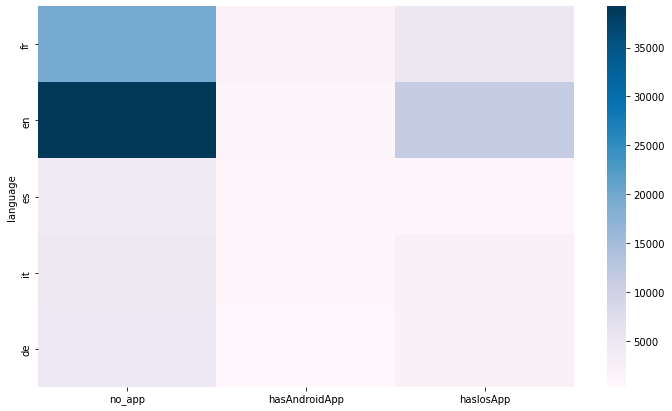

In [ ]:
sns.heatmap(apps_by_language, cmap='PuBu')

Bar Chart больше подходит для наглядности этих показателей, но тут всё же заметна картина, которую мы уже видели по странам. Если мы всё же решимся создавать приложение, то имеет смысл это делать для начала на английском, французском на Ios, а затем на итальянском.